<a href="https://colab.research.google.com/github/thekishanpatel/FastAi/blob/master/FastAi_Lesson1_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

Setting Up Notebook for FastAi

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)


Mounted at /content/drive


In [0]:
root_dir = "/content/drive/My Drive/"
base_dir = root_dir + 'fastai-v3/'


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# **Import FastAi Library *(built upon Pytorch)***

In [0]:
!pip install --upgrade fastai
from fastai import *
from fastai.vision import *

Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (1.0.60)


In [0]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



# **Import Data and Build Model**

In [0]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [0]:
path = untar_data(URLs.PETS);path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_anno = path/'annotations'
path_imgs = path/'images'

In [0]:
fnames = get_image_files(path_imgs)
fnames[:5] 

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_171.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/boxer_34.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/samoyed_118.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_90.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_132.jpg')]

In [0]:
# Get Labels, which are located in the file names. We will be using regular expressions to extract the labels
np.random.seed(2) #This establishes the validation set
pat = r'/([^/]+)_\d+.jpg$'
data = ImageDataBunch.from_name_re(path_imgs, fnames, pat, ds_tfms=get_transforms(), size = 224) # the transforms function is going to help make the images of the same size, in this case of size = 224
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Maine_Coon,boxer,samoyed,keeshond,British_Shorthair
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Ragdoll,american_pit_bull_terrier,havanese,samoyed,Persian
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

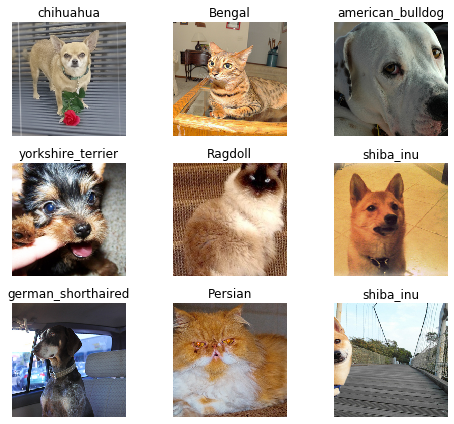

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
 print(data.classes); len(data.classes), data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

Training a Model using resnet34

In [0]:
help(cnn_learner)

Help on function cnn_learner in module fastai.vision.learner:

cnn_learner(data:fastai.basic_data.DataBunch, base_arch:Callable, cut:Union[int, Callable]=None, pretrained:bool=True, lin_ftrs:Union[Collection[int], NoneType]=None, ps:Union[float, Collection[float]]=0.5, custom_head:Union[torch.nn.modules.module.Module, NoneType]=None, split_on:Union[Callable, Collection[Collection[torch.nn.modules.module.Module]], NoneType]=None, bn_final:bool=False, init=<function kaiming_normal_ at 0x7fe3d93a7950>, concat_pool:bool=True, **kwargs:Any) -> fastai.basic_train.Learner
    Build convnet style learner.



In [0]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 23.1MB/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.377205,0.312344,0.104871,01:22
1,0.606002,0.273810,0.087957,01:21
2,0.377062,0.229543,0.069012,01:20
3,0.270888,0.214799,0.064953,01:19


In [0]:
learn.save('stg-1')

# **Lets Look at the Results**

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

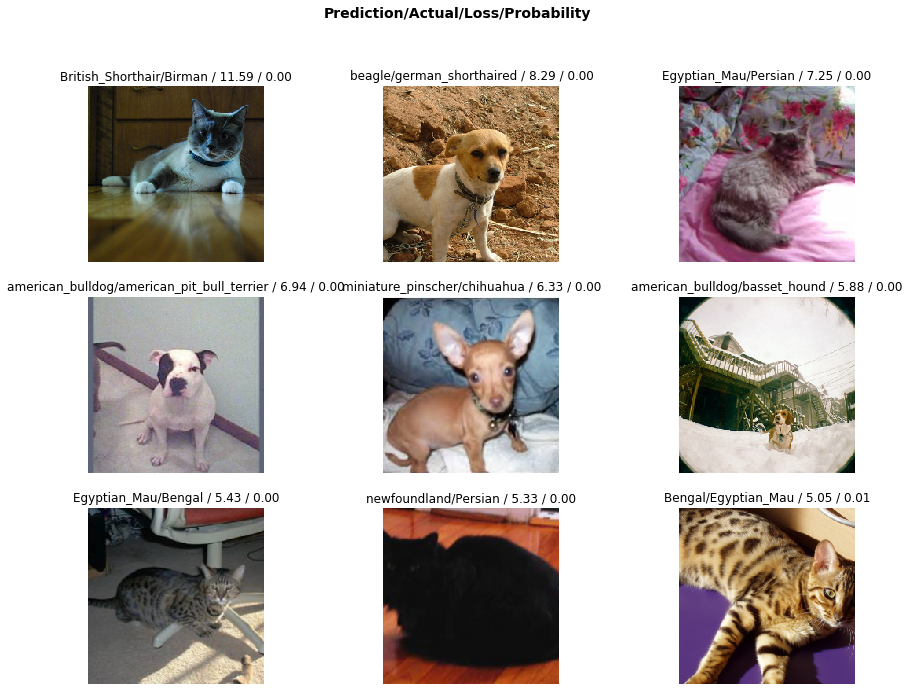

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
 interp.most_confused(min_val = 2)

[('american_pit_bull_terrier', 'american_bulldog', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('Bengal', 'Egyptian_Mau', 4),
 ('Ragdoll', 'Birman', 4),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('english_cocker_spaniel', 'english_setter', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Birman', 'Ragdoll', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Siamese', 'Birman', 2),
 ('basset_hound', 'beagle', 2),
 ('beagle', 'basset_hound', 2),
 ('boxer', 'american_bulldog', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

# **Unfreezing, Fine-Tuning, and Learning Rates**
Since our model is working as we expect, we will *unfreeze* our model and train some more.

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.679725,0.368528,0.119756,01:23


In [0]:
learn.load('stg-1');

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


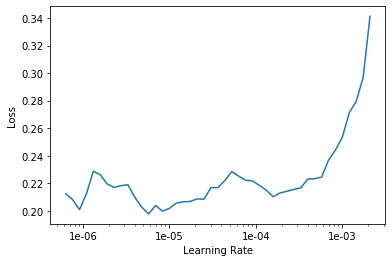

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.240177,0.205512,0.063599,01:21
1,0.212668,0.202047,0.063599,01:21


In [0]:
learn.save('stg-2')

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('Bengal', 'Egyptian_Mau', 6),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Ragdoll', 'Birman', 4),
 ('Birman', 'Ragdoll', 3),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('english_cocker_spaniel', 'english_setter', 3),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Ragdoll', 'Maine_Coon', 2),
 ('Russian_Blue', 'Abyssinian', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('beagle', 'basset_hound', 2),
 ('boxer', 'american_bulldog', 2),
 ('miniature_pinscher', 'chihuahua', 2)]

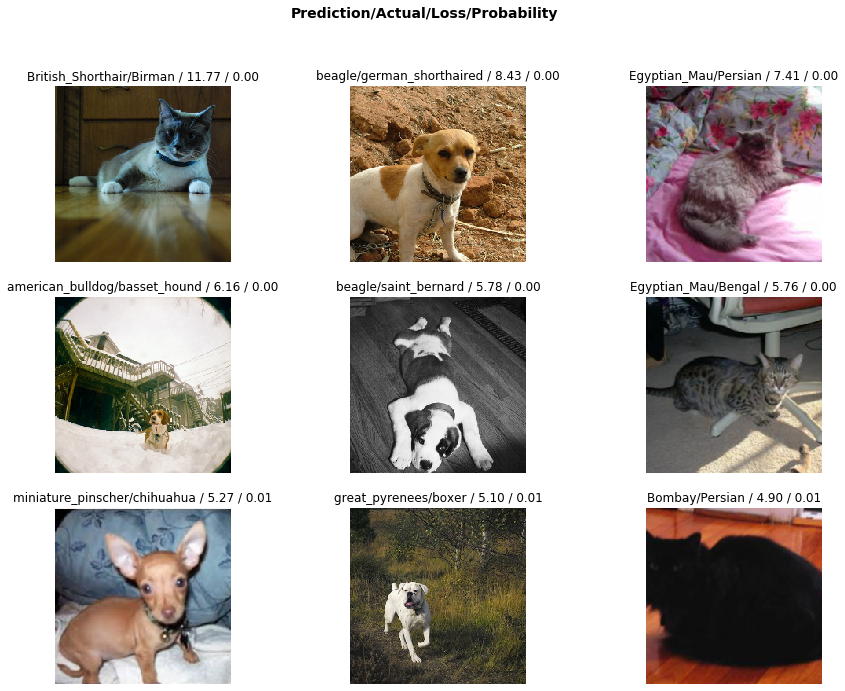

In [0]:
interp2 = ClassificationInterpretation.from_learner(learn)
interp2.plot_top_losses(9, figsize = (15,11))
interp2.most_confused(min_val = 2)